In [61]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
import pandas as pd 
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../generalization')

from helpers import get_colors, get_tastes, sample_concept, process_word_associations
from utils import load_yaml, display_df
from data_processing.abstract_lang import load_arbitrary_path

In [130]:
df = pd.read_csv(f'/dlabscratch1/veselovs/projects/llm-latent-language/data/norms/augmented_merge_en_nl.csv')


In [131]:
df[df['concept_en'] == 'kettle'].drop_duplicates()

,concept_en,feature_en_en,freq_en,concept_nl,feature_nl,freq_nl,feature_nl_en
207504,kettle,black,3.0,ketel,zwart,6.0,"['black', 'color', 'coloring', 'colouring', 'c..."
207610,kettle,brown,NaN,waterkoker,bruin,1.0,"['John Brown', 'Brown', 'brown', 'brownness', ..."
207706,kettle,gray,NaN,waterkoker,grijs,1.0,"['gray', 'grey', 'greyness', 'grayness']"
207728,kettle,grey,NaN,waterkoker,grijs,1.0,"['gray', 'grey', 'greyness', 'grayness']"
207731,kettle,silver,3.0,NaN,NaN,NaN,NaN
207732,kettle,white,NaN,waterkoker,wit,3.0,"['whiteness', 'white', 'colorimetric whiteness..."
207860,kettle,yellow,NaN,waterkoker,geel,1.0,"['yellow', 'yellowness']"


In [132]:
config = load_yaml('config.yaml')

In [227]:
lang = 'de'
df = process_word_associations(lang, min_freq=5, feat='color', min_feat_freq=1)
save_path = '../data/norms/processed/'
save_fname = f'{lang}.csv'

/dlabscratch1/veselovs/projects/llm-latent-language/src/helpers.py:69: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[concept_other] = df[concept_other].fillna(method='ffill')


In [228]:
mode = 'combined' # combined, separate
n_sample = 'all'

if mode == 'combined':
    data, _ = sample_concept(df, n_sample, mode=mode)
if mode == 'separate':
    data, s_other = sample_concept(df, n_sample, mode=mode)

In [222]:
concepts = data['concept_en'].unique()
n_concepts = len(concepts)

In [223]:
colors = ["tab:blue", "tab:orange"]  # Red and Blue

In [224]:
df[df['concept_en'] == 'hay']

,concept_en,feature_en_en,concept_ja,feature_ja,feature_ja_en,freq_en,freq_ja,total_en,total_other,frac_en,frac_ja,diff


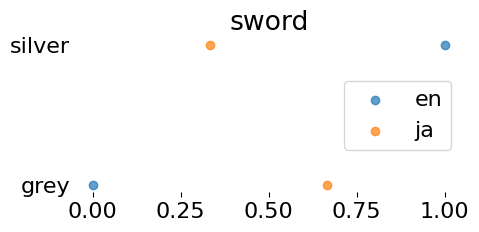

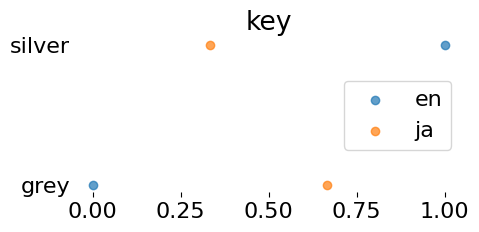

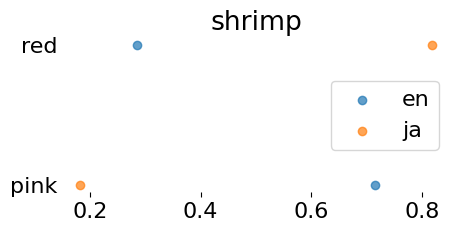

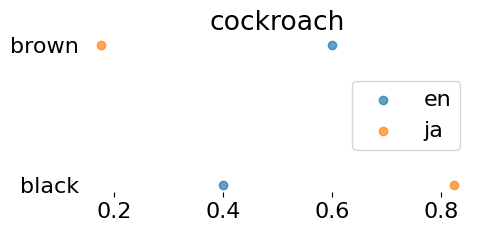

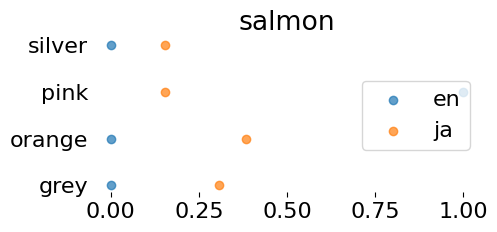

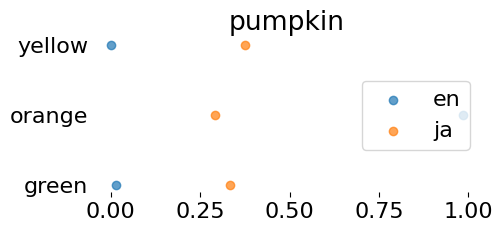

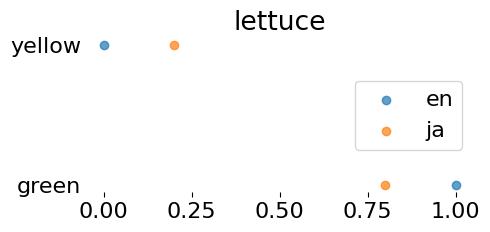

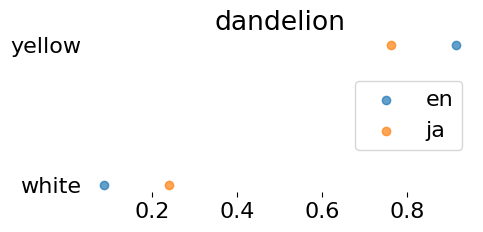

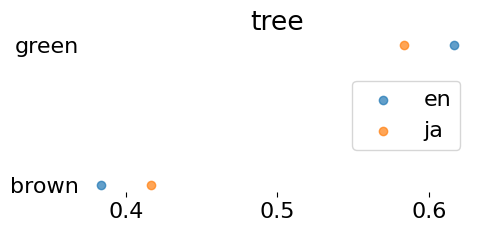

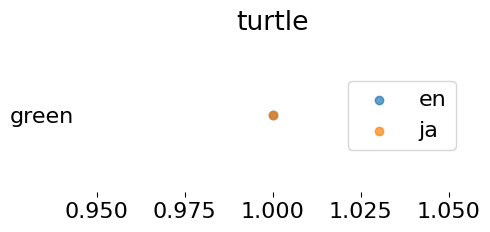

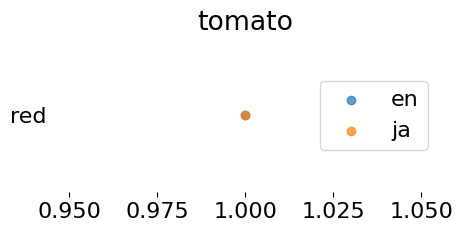

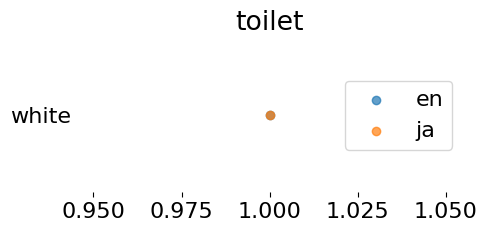

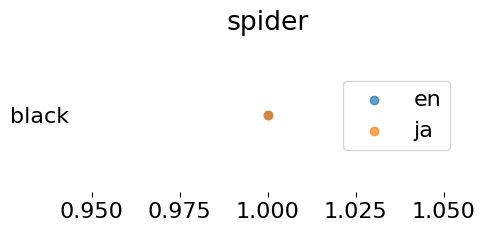

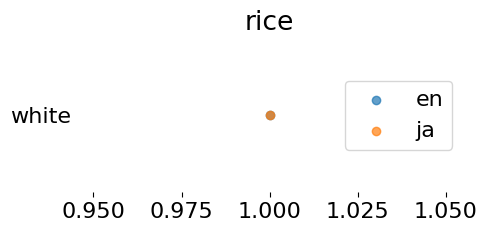

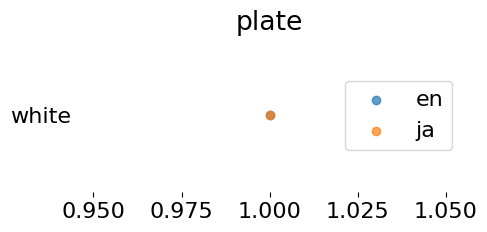

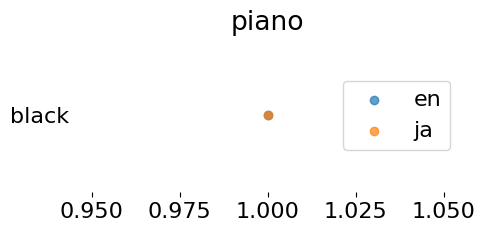

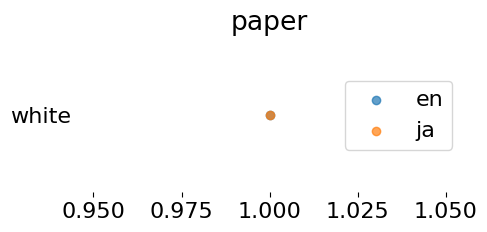

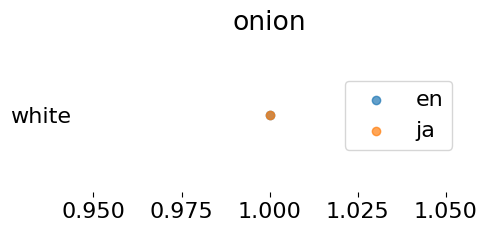

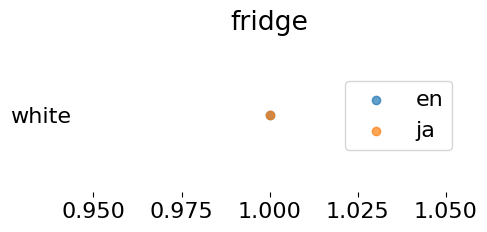

In [225]:
plt_kwargs = {'alpha': 0.7}

def plt_ax(ax, temp):
    ax.scatter(temp['frac_en'], temp['feature_en_en'], color=colors[0], label='en', **plt_kwargs)
    ax.scatter(temp[f'frac_{lang}'], temp['feature_en_en'], color=colors[1], label=lang, **plt_kwargs)


    ax.spines[['left', 'right','bottom','top']].set_visible(False)

    ax.tick_params(axis='y', length=0)
    ax.set_title(concept)


for concept in concepts: 
    save_path = f'../../visuals/associations/{lang}/{concept}/'
    os.makedirs(save_path, exist_ok=True)
    temp = data[data['concept_en'] == concept]
    temp = temp.groupby(['concept_en','feature_en_en'])[['frac_en', f'frac_{lang}']].sum().reset_index()
    label_kwargs = {'fontsize': 13}
    fig, ax = plt.subplots(figsize=(5,2))
    plt_ax(ax, temp)
    
    plt.legend(frameon=True, loc='right')
    plt.savefig(os.path.join(save_path, 'scatter_plot.jpg'), dpi=300, bbox_inches='tight')